## Assignment

Send the assignment to lmfh@cin.ufpe.br.

With the `tips` dataset:
1. Plot the distribution of the target variable (tips);
2. Plot the heat map of the correlation of the variables;
3. Generate a model, other than LinearRegression (choose any other model from https://scikit-learn.org/stable/supervised_learning.html#supervised-learning), to predict the tips variable;
4. Show the scatter plot between the predicted and real values and the distribution plot of the difference between the predicted and real values.

https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [51]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

from sklearn.model_selection import train_test_split
X = tips.drop('tip', axis = 1)
y = tips['tip']

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['sex'] = lb.fit_transform(X['sex'])
X['smoker'] = lb.fit_transform(X['smoker'])
X['day'] = lb.fit_transform(X['day'])
X['time'] = lb.fit_transform(X['time'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


/Users/Matheus/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


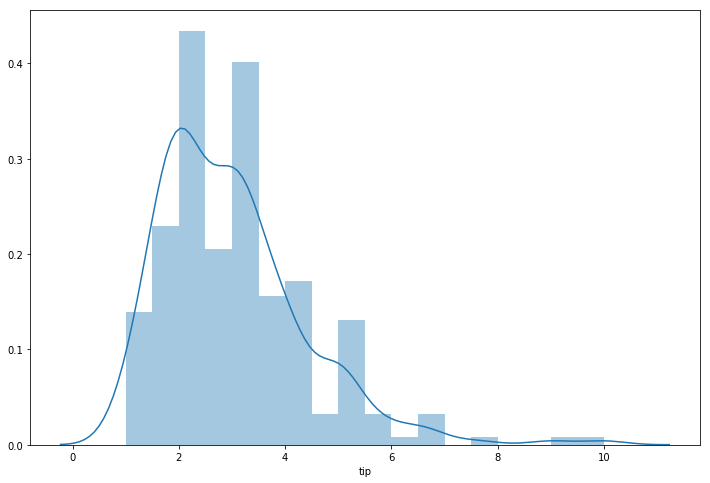

In [48]:
#item (1)
sns.distplot(y)

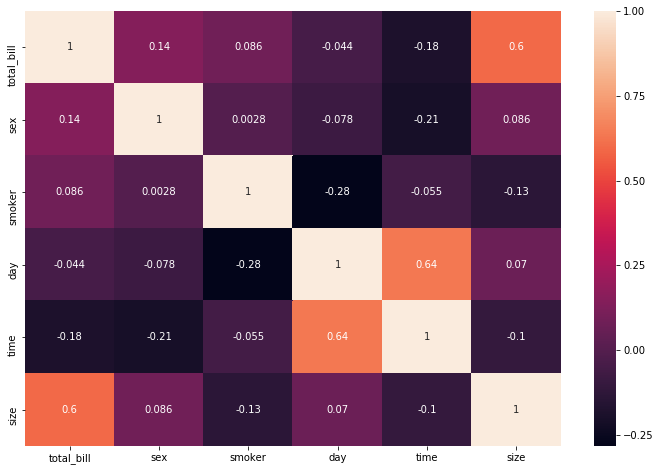

In [49]:
#item (2)
plt.rc("figure", figsize = (12, 8))
sns.heatmap(X.corr(), annot=True)

(0, 12)

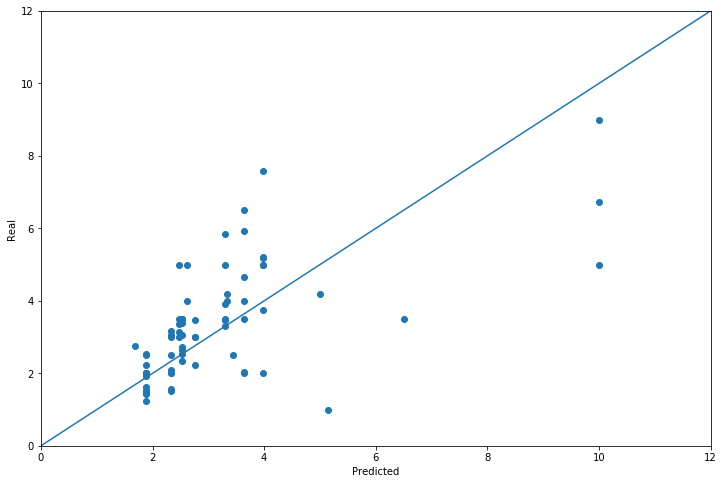

In [67]:
# item (3), modelo selecionado Arvore de decisão (decision tree)
from sklearn.tree import DecisionTreeRegressor

#fit regression model
regr = DecisionTreeRegressor(max_depth=5)
regr.fit(X_train, y_train)

#Predict
y_predict = regr.predict(X_test)

serie = range(0,15)

(0, 12)

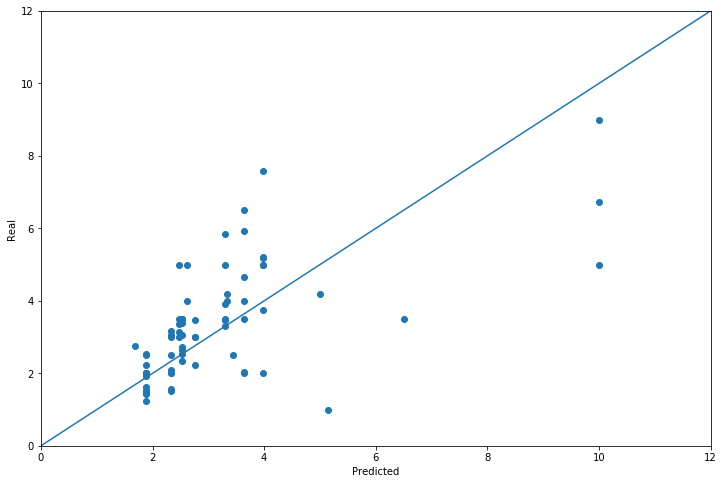

In [71]:
#item (4)
figure, axes = plt.subplots()
axes.plot(serie)
axes.scatter(y_predict, y_test)
axes.set_xlabel("Predicted")
axes.set_ylabel("Real")
axes.set_xlim([0, 12])
axes.set_ylim([0, 12])

/Users/Matheus/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


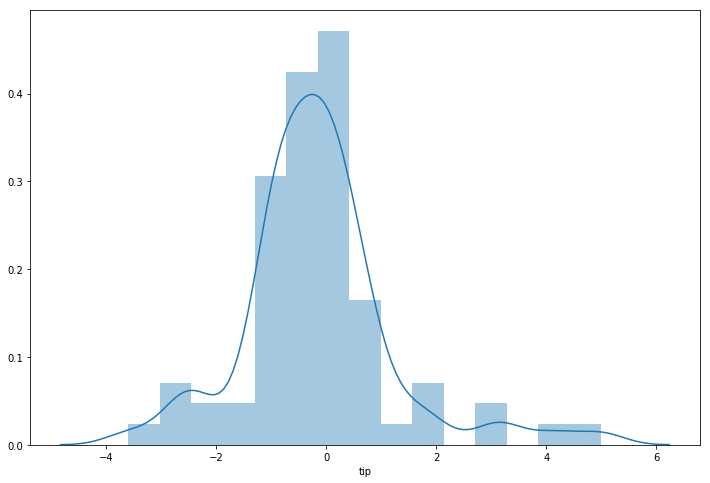

In [70]:
#item (4)
sns.distplot((y_predict - y_test))